In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
pd.set_option("display.max_columns", 85)

In [2]:
def fetch_data(drop_some=True):

    df = pd.read_csv("../data/abnormal_writeout.data.csv")

    if drop_some:
        # trascurare da ACC a UVM
        start_drop = df.columns.get_loc("ACC")
        end_drop = df.columns.get_loc("UVM")
        cols = np.arange(start_drop, end_drop + 1)
        df.drop(df.columns[cols], axis=1, inplace=True)

        # trascurare old_phylo_factor e la prima colonna
        df.drop("oldest_phylostratum_factor", axis=1, inplace=True)
        df.drop("Unnamed: 0", axis=1, inplace=True)

    return df


def separate_data(df):
    resp = df["response"]
    occ = df["occ_total_sum"]
    age = df["oldest_phylostratum"]
    conf = df.drop(labels=["response", "occ_total_sum", "oldest_phylostratum"], axis=1)
    return occ, age, conf, resp


def get_PCA(X, expl_var=0.95, plot=False):

    pca_test = PCA()
    pca_test.fit(X)
    cumsum = np.cumsum(pca_test.explained_variance_ratio_)
    d = np.argmax(cumsum >= expl_var) + 1

    # Apply PCA with d components
    pca_apply = PCA(n_components=d)
    X_PCA = pca_apply.fit_transform(X)

    print("Using {} principal components.".format(d))
    if plot == True:
        sns.heatmap(pd.DataFrame(X_PCA).corr())
        plt.show()

    return X_PCA

In [3]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Data
df = fetch_data()  # Get
df.dropna(inplace=True)  # Clean
X_occ, X_age, X_conf, Y = separate_data(df)  # Separate
X_conf_pca = get_PCA(X_conf, plot=True)  # PCA

# All features, confounders with PCA
X = np.c_[X_occ, X_age, X_conf_pca]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Using 47 principal components.


<Figure size 640x480 with 2 Axes>

In [45]:
plot_df = pd.DataFrame(np.c_[Y, X])
plot_df = plot_df.rename(columns={0: "response", 1: "occ_sum", 2: "age"})
plot_df = plot_df.sample(1000)
plot_df

,response,occ_sum,age,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
10005,0.0,0.367295,-0.448955,0.253372,-1.197845,1.084654,-0.943083,0.800036,-2.343164,0.431580,0.269868,1.020629,0.474354,0.639941,-1.197872,1.002931,-0.432054,-0.369523,0.927979,0.060745,-0.327206,-0.137294,-0.208681,0.109074,0.352275,-0.307744,0.315903,-0.456415,-0.154678,0.335696,-0.336922,-0.736590,-0.223051,-0.149100,-0.017572,-0.423071,-0.381828,-0.359986,-0.583630,-0.272276,1.229401,0.509474,-0.350060,0.015524,0.389647,0.683877,-0.409517,0.116825,0.031479,0.427610
13782,0.0,0.348159,0.491031,1.414416,-0.975113,1.565431,-0.073637,-1.186821,-0.512533,1.311149,0.455025,0.435569,0.104070,-1.491078,0.187072,-0.015972,-0.050773,0.056115,-0.991634,-0.169716,-1.116123,-0.139596,-0.176830,0.413686,0.471500,-0.669679,0.070932,-0.016718,0.351544,1.005812,-0.445728,0.430821,0.368558,0.285947,-0.626361,0.220681,-0.507858,0.590874,0.612185,0.163421,-0.508936,-0.856115,-0.389882,-0.893614,-0.789520,0.250312,0.745676,0.443099,-0.170549,0.113816
14708,0.0,-0.225925,1.666013,7.313392,0.499077,0.301497,-0.175074,0.477571,-0.326736,1.879084,-0.221464,0.275177,1.527342,-0.654846,-0.938277,1.327935,-0.142010,1.659981,-0.341369,-0.933983,-1.286755,-0.120622,-0.855392,0.019144,-1.210052,-0.496301,0.106024,0.824515,-0.575957,1.388885,1.602007,-0.089976,-0.374255,0.280301,-0.435288,-1.042339,-0.602857,1.060862,0.406820,-0.846609,0.572601,0.310437,0.411517,-0.052335,-1.034798,1.409629,0.265906,-0.370268,-0.044851,-0.309491
4389,1.0,1.649415,0.256034,-3.351311,-1.331329,0.798990,0.377788,-1.090520,0.190062,-0.494713,1.611666,-1.476580,-1.179790,-0.759909,1.200127,-3.133230,1.408247,0.666551,-0.149046,-1.007416,1.046307,1.189504,0.359148,0.836986,-1.458492,0.236230,0.596049,1.349333,-0.630615,0.556163,0.416334,-0.627010,1.206485,0.336632,-0.631457,-0.280936,-1.110083,-0.308561,-0.215979,-0.252394,0.111439,-0.384091,-0.075139,0.940554,0.245291,1.178673,-1.569606,-0.210657,0.115895,0.233651
5095,0.0,-0.034564,-0.448955,-0.470557,-2.188380,0.347399,-1.179702,-1.312709,-0.286869,2.233717,-0.833193,1.234912,0.096600,1.558859,-0.126088,-1.051529,-1.211581,-0.325912,0.055501,-0.332970,-0.505032,-0.315277,0.419226,-0.535084,1.256602,-0.069428,0.689070,0.665176,-0.188749,-0.998382,-0.821716,0.930352,0.987902,-0.027576,-0.839748,0.172377,-0.255065,0.270369,0.565398,0.785918,-0.777501,-1.056248,-0.680568,0.743552,1.000693,0.724520,0.123040,0.993148,0.096615,-1.357294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5993,0.0,0.195070,-0.683952,-7.029774,-5.030355,-0.155861,0.143892,0.222597,1.303628,-0.019313,0.016650,0.148103,2.185540,0.488979,0.912870,0.012625,-1.288025,-1.148139,-0.947038,0.854609,-0.454586,-0.136158,-0.068040,1.074332,-0.160451,0.113600,-0.360864,-0.034708,0.772886,0.058772,0.233863,-0.361888,0.016555,-0.716569,0.219409,-0.652736,-1.078250,-0.341904,0.401693,-0.353284,0.642876,0.145505,0.837801,-0.185931,0.064474,-0.376745,0.104869,0.252481,-0.257176,-0.220982
12370,0.0,0.635200,-0.448955,-7.201489,-1.433159,-0.040664,-0.676461,2.007317,-0.044545,0.793013,1.245493,0.305212,0.301305,-0.577091,-0.221222,1.531487,-0.302060,-0.584077,-0.418009,-0.123141,0.190872,0.513879,0.202604,-0.684728,0.464472,-0.170298,-0.284689,-0.038413,-0.194050,0.033218,0.259673,-0.016128,-1.020660,-0.148942,0.405052,0.606873,0.639575,-0.311985,0.318406,0.238179,-0.543153,-0.203292,-0.202991,0.238106,-0.271166,0.269903,-0.052083,-0.012467,-0.221630,-0.623137
18116,0.0,-0.646920,0.491031,14.817878,4.615497,-10.505306,6.497533,-1.196609,8.902489,-1.917625,-1.864965,-0.124568,10.808256,-0.991070,-1.401993,0.526521,-2.851908,-0.365844,0.560243,-2.362304,0.562398,1.575121,0.953279,-2.865363,-0.520183,0.208913,3.299459,3.338503,-2.226545,3.790286,2.644306,-2.251182,-2

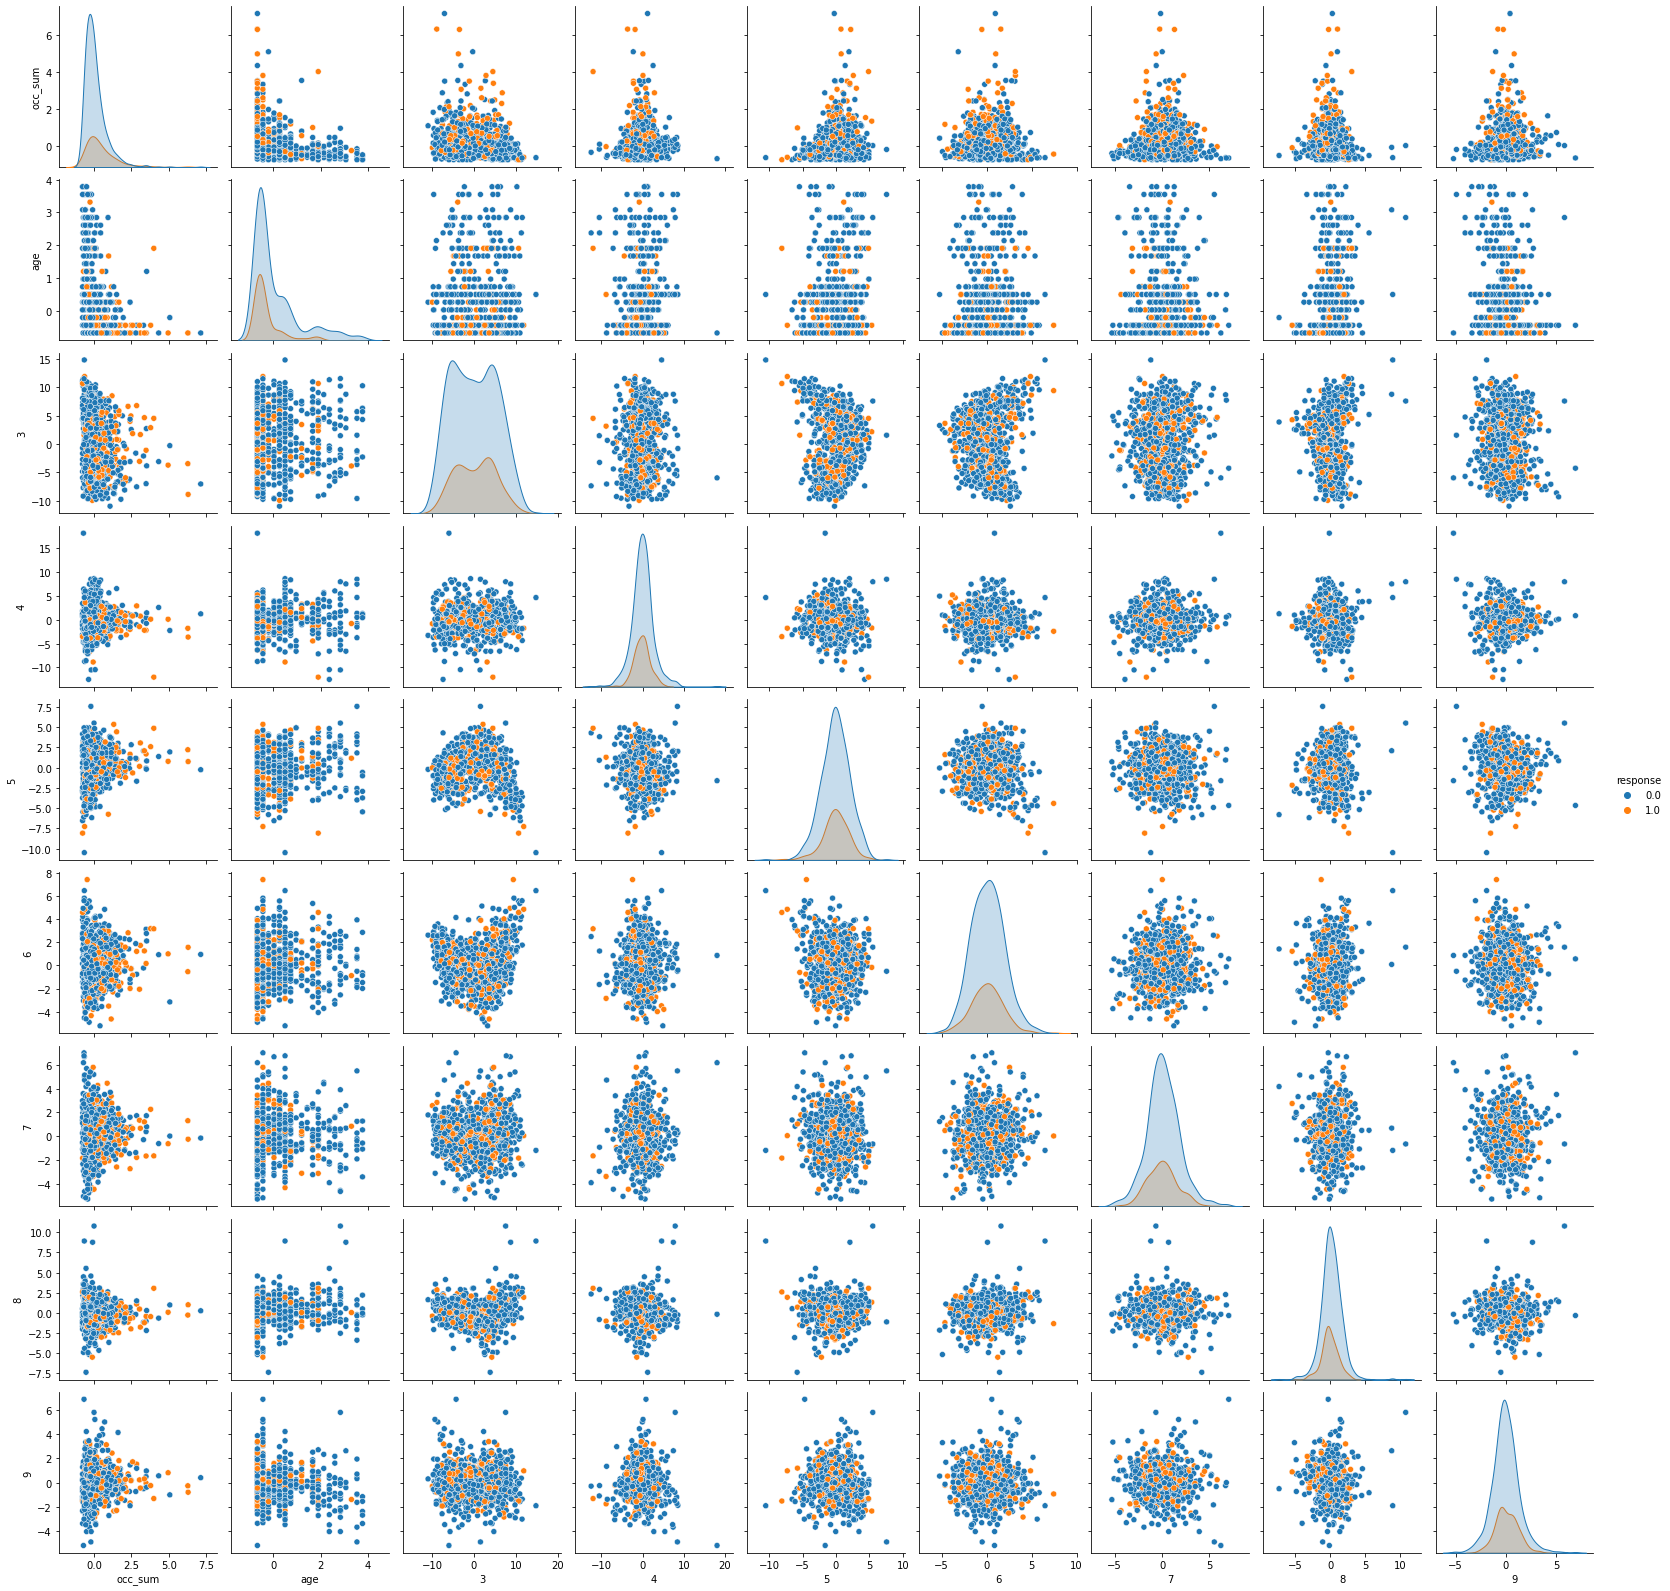

In [46]:
sns.pairplot(plot_df.iloc[:, 0:10], hue="response")
plt.title("